In [99]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation,LSTM
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [85]:
# deal with tickers in S&P 500
sp500 = ['ABT', 'ABBV', 'ACN', 'ACE', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 'A', 'GAS', 'APD', 'ARG', 'AKAM', 'AA', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BXLT', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK-B', 'BBY', 'BLX', 'HRB', 'BA', 'BWA', 'BXP', 'BSK', 'BMY', 'BRCM', 'BF-B', 'CHRW', 'CA', 'CVC', 'COG', 'CAM', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DTV', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FSIV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOGL', 'GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HCN', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HSP', 'HST', 'HCBK', 'HUM', 'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JOY', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'GMCR', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KRFT', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LLTC', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MHFI', 'MCK', 'MJN', 'MMV', 'MDT', 'MRK', 'MET', 'KORS', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PLL', 'PH', 'PDCO', 'PAYX', 'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'RHT', 'REGN', 'RF', 'RSG', 'RAI', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RLC', 'R', 'CRM', 'SNDK', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIAL', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'STJ', 'SWK', 'SPLS', 'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 'TEL', 'TE', 'TGNA', 'THC', 'TDC', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TWC', 'TJK', 'TMK', 'TSS', 'TSCO', 'RIG', 'TRIP', 'FOXA', 'TSN', 'TYC', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WFM', 'WMB', 'WEC', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS']
sp500_name = ''
for item in sp500:
    sp500_name += item + ' '

In [103]:
# stateless model
# feature creation of moving average
def moving_average(n,df): 
    """
    # Arguments
        n: lag of moving average
        df: dataframe, need to have column named 'Close', need to use date as index
    # Return
        return a series with date as index and close price
    We will use close price to calculate
    """
    start_mean = df['Close'][:n].mean()
    list_mean = [start_mean]
    for i in range(n,len(df.index)):
        start_mean += df['Close'][i]/n -  df['Close'][i-n]/n
        list_mean.append(start_mean)
    return pd.Series(list_mean,index=df.index[n-1:],name='MA_'+str(n))

def feature_create(list_ma,df): 
    """
    # Arguments
        list_ma: list of intergers, contains lag of moving average
        df: dataframe, need to have column named 'Close', need to use date as index
    # Return
        return a dataframe, including original data and new moving average columns
        we will dropna, there will be no NA in dataframe
    """
    new_df = pd.merge(df,moving_average(list_ma[0],df),how='outer',left_index=True,right_index=True)
    for num in list_ma[1:]:
        new_df = pd.merge(new_df,moving_average(num,df),how='outer',left_index=True,right_index=True)
    return new_df.dropna()

# data processing
def df_standarlize(df):
    temp_df = np.array(df)
    s = StandardScaler()
    s.fit(temp_df)
    return pd.DataFrame(s.transform(temp_df),index=df.index,columns=df.columns)

# input creation
def LSTM_input_generator(df,window_len,pred_len,start_date,end_date):
    """
    # Arguments
        df: dataframe, index is time_stamp, columns are different features, no NA allowed
        window_len: how many historical data will feed into model
        pred_len: length for prediction period
        start_date: date that we start gathering features, time stamp
        end_date: date that we stop gathering features, time stamp
    # Return
        x: three dimension array: (sample size, time_step,feature dimension), sample size is determined by date range
        y: value, for example: close price five days later
    """
    dimension = len(df.columns)
    df_select = df[df.index >=start_date]
    df_select = df_select[df_select.index <= end_date]
    sample_size = len(df.index) - pred_len - window_len + 1
    x,y = [],[]
    for i in range(window_len-1,len(df.index)-pred_len):
        x.append(np.array(df_select.iloc[i-window_len+1:i+1]))
        y.append(df_select['Close'][i+pred_len])
    return np.array(x).reshape(sample_size,window_len,dimension), np.array(y).reshape(sample_size,1)

# train, test split, for stateless case
def split_data(x,y,split_point):
    """
    # Arguments
        x: three dimension array: (sample size, time_step,feature dimension), sample size is determined by date range
        y: value, for example: close price five days later
        split_pint: a float between 0 and 1, and this percentage of data will be train data
    # Return
        x_train, x_test, y_train, y_test: shape same as (x,y)
    """
    split = int(y.shape[0] * split_point)
    return x[:split], x[split:], y[:split], y[split:]

# get data from a company, featurize it,drop ['Dividends','Stock Splits','Volume']
def get_standarize_data(ticker,list_ma):
    """
    # Arguments
        ticker: company ticker
        list_ma: list of intergers, contains lag of moving average
    # Return
        return a dataframe only with standard features, index is timestamp
    """
    raw_data = feature_create(list_ma,yf.Ticker(ticker).history(period='max')).drop(['Dividends','Stock Splits','Volume'],axis=1)
    return df_standarlize(raw_data)

# model traing, metrix report, draw graph
def LSTM_model(stock_num,window_len,pred_len,epoch):
    split_point = 0.9
    c = get_standarize_data(sp500[stock_num],[3,5,10,20])
    x,y = LSTM_input_generator(c,window_len,pred_len,c.index[0],c.index[-1])
    x_train,x_test,y_train,y_test = split_data(x,y,0.7)
    model = Sequential()
    model.add(LSTM(units=50, input_shape=(window_len, 8)))
    model.add(Dense(output_dim=64,activation='sigmoid'))
    model.add(Dense(output_dim=1,activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=epoch,batch_size=128,verbose=1,shuffle=False)
    c_1 = c.iloc[-y_test.shape[0]:,:]
    c_1['pred'] = model.predict(x_test)
    plt.figure(figsize=(20,10))
    plt.plot(c_1['Close'])
    plt.plot(c_1['pred'])
    plt.show()
    print(mean_squared_error(model.predict(x_test),y_test))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=64)`
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`


Epoch 1/100
6431/6431 [==============================] - 6s 878us/step - loss: 0.0471
Epoch 2/100
6431/6431 [==============================] - 1s 225us/step - loss: 0.0685
Epoch 3/100
6431/6431 [==============================] - 1s 221us/step - loss: 0.0598 0s - loss: 0.0
Epoch 4/100
6431/6431 [==============================] - 2s 242us/step - loss: 0.0467
Epoch 5/100
6431/6431 [==============================] - 2s 240us/step - loss: 0.0359
Epoch 6/100
6431/6431 [==============================] - 2s 235us/step - loss: 0.0278
Epoch 7/100
6431/6431 [==============================] - 2s 233us/step - loss: 0.0223
Epoch 8/100
6431/6431 [==============================] - 2s 244us/step - loss: 0.0188
Epoch 9/100
6431/6431 [==============================] - 2s 242us/step - loss: 0.0167
Epoch 10/100
6431/6431 [==============================] - 1s 230us/step - loss: 0.0156 0s
Epoch 11/100
6431/6431 [==============================] - 2s 235us/step - loss: 0.0150
Epoch 12/100
6431/6431 [==========

Epoch 93/100
6431/6431 [==============================] - 1s 226us/step - loss: 0.0144 0s - los
Epoch 94/100
6431/6431 [==============================] - 1s 233us/step - loss: 0.0144
Epoch 95/100
6431/6431 [==============================] - 1s 227us/step - loss: 0.0149 0s - loss
Epoch 96/100
6431/6431 [==============================] - 1s 227us/step - loss: 0.0153
Epoch 97/100
6431/6431 [==============================] - 1s 233us/step - loss: 0.0150
Epoch 98/100
6431/6431 [==============================] - 2s 235us/step - loss: 0.0161 0s - loss
Epoch 99/100
6431/6431 [==============================] - 2s 239us/step - loss: 0.0150
Epoch 100/100
6431/6431 [==============================] - 1s 207us/step - loss: 0.0162


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


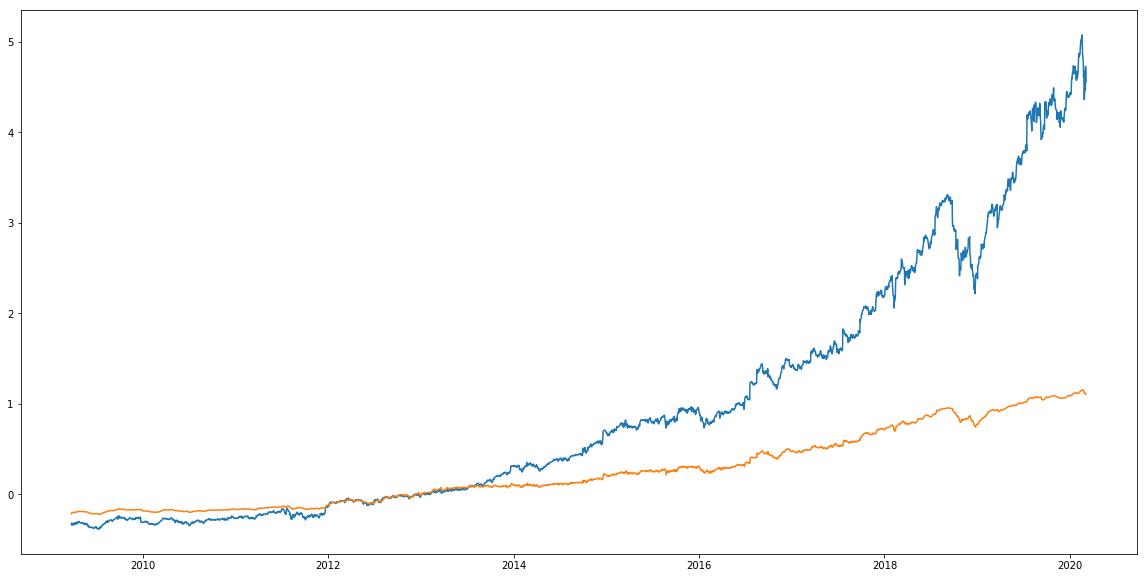

1.4267417860023788


In [106]:
LSTM_model(100,5,1,100)

In [105]:
# stateful model